In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import numpy as np 
iris = load_iris()



In [ ]:
X = iris.data 
y = iris.target 
 
data=np.c_[iris.data, iris.target] 
columns = np.append(iris.feature_names, ["target"]) 
df = pd. DataFrame(data, columns=columns) 
print(df) 
print(iris.feature_names)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0       0.0  

In [ ]:
df[iris.feature_names].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


[]

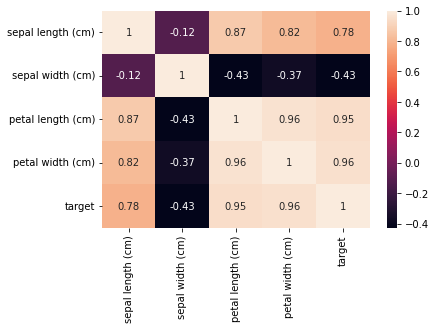

In [ ]:

sns.heatmap(df[iris.feature_names].corr(), annot=True) 
plt.plot()

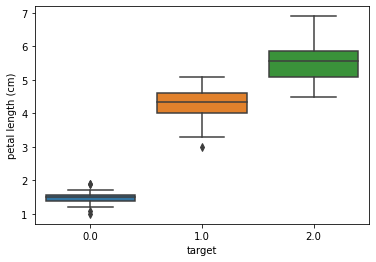

In [ ]:
sns.boxplot(x="target",y="petal length (cm)",data=df)

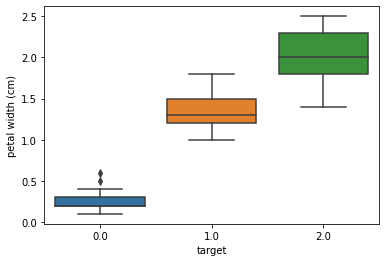

In [ ]:
sns.boxplot(x="target",y="petal width (cm)",data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


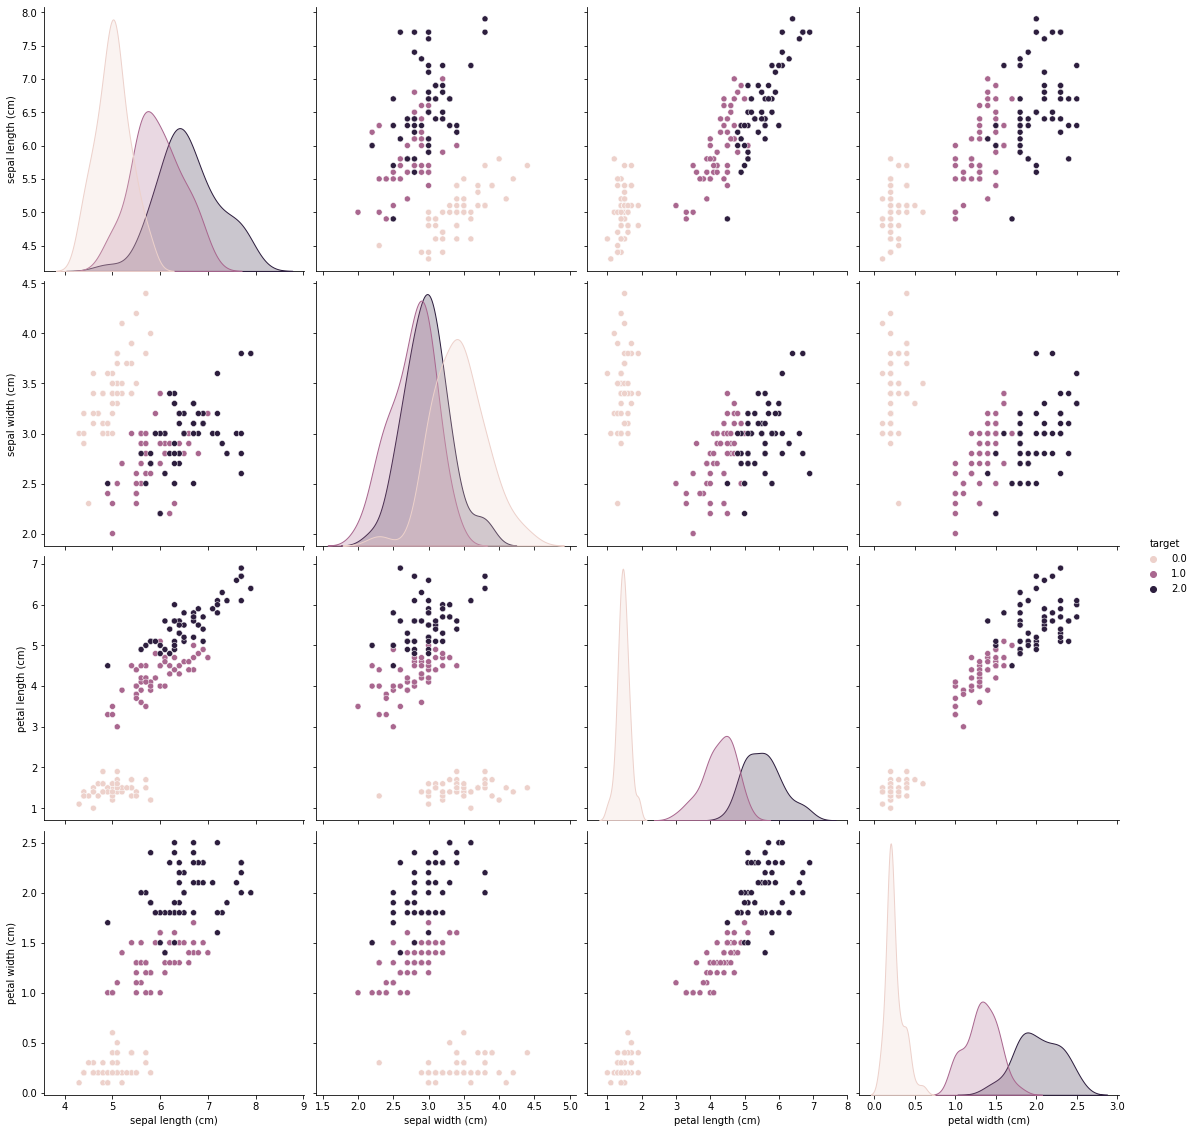

In [ ]:
sns.pairplot(df, hue="target", size=4)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 4) 
print(X_train.shape) 
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

test_k = range(1,26) 
scores = [] 
for k in test_k:
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train,y_train) 
    y_pred = knn.predict(X_test) 
    scores.append(metrics.accuracy_score(y_test,y_pred))


Text(0, 0.5, 'Accuracy on test data')

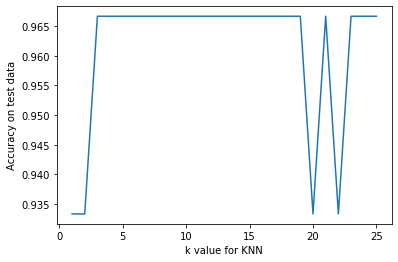

In [ ]:
plt.plot(test_k, scores) 
plt.xlabel('k value for KNN') 
plt.ylabel('Accuracy on test data')

In [ ]:
cv_scores = [] 
for k in test_k:
   knn = KNeighborsClassifier(n_neighbors=k) 
   score = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy') 
   cv_scores.append(score.mean())

MSE = [1 - x for x in cv_scores]

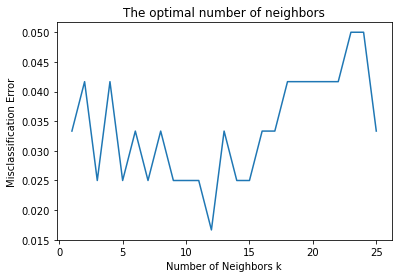

In [ ]:
plt.title('The optimal number of neighbors') 
plt.xlabel('Number of Neighbors k') 
plt.ylabel('Misclassification Error') 
plt.plot(test_k, MSE)
plt.show()



In [ ]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train) 
y_pred = knn.predict(X_test) 
print("accuracy is:",metrics.accuracy_score(y_test,y_pred)*100)


accuracy is: 96.66666666666667


In [ ]:
from sklearn.metrics import classification_report
report=metrics.classification_report(y_test,y_pred) 
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.80      0.89         5
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.93      0.95        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
from sklearn.metrics import confusion_matrix
cm=metrics.confusion_matrix(y_test,y_pred) 
print(cm)

[[16  0  0]
 [ 0  4  1]
 [ 0  0  9]]
